In [1]:
# Importing basic libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Loading the dataset CSV files
train = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')

In [3]:
# Displaying number of samples
print('Number of train samples: ', train.shape[0])

Number of train samples:  3662


In [4]:
print("\nTrain dataset info:")
train.info()


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [5]:
# Checking missing values
print("Missing Values in Train:\n", train.isnull().sum())

Missing Values in Train:
 id_code      0
diagnosis    0
dtype: int64


In [6]:
#heading columns of the training dataset
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


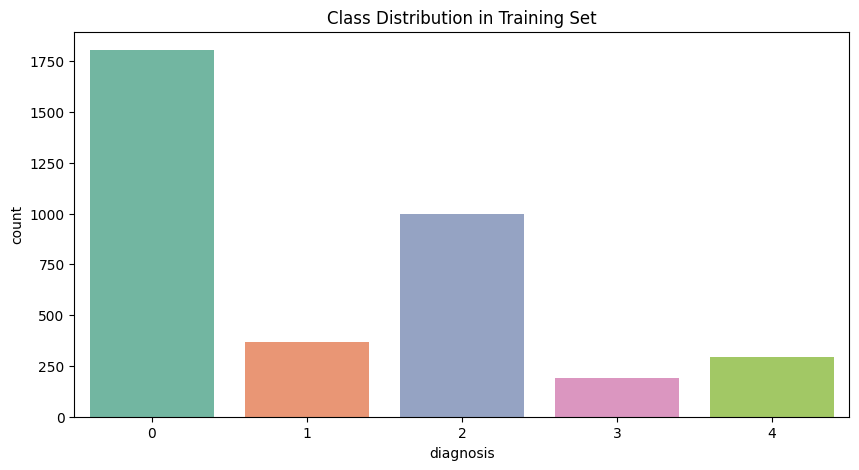

In [7]:
# class distribution in the training set
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="diagnosis", data=train, palette="Set2", ax=ax)
plt.title("Class Distribution in Training Set")
plt.show()

In [8]:
# Setting parameters
N_Classes = 5
IMAGE_SIZE = 224
BATCH_SIZE = 32

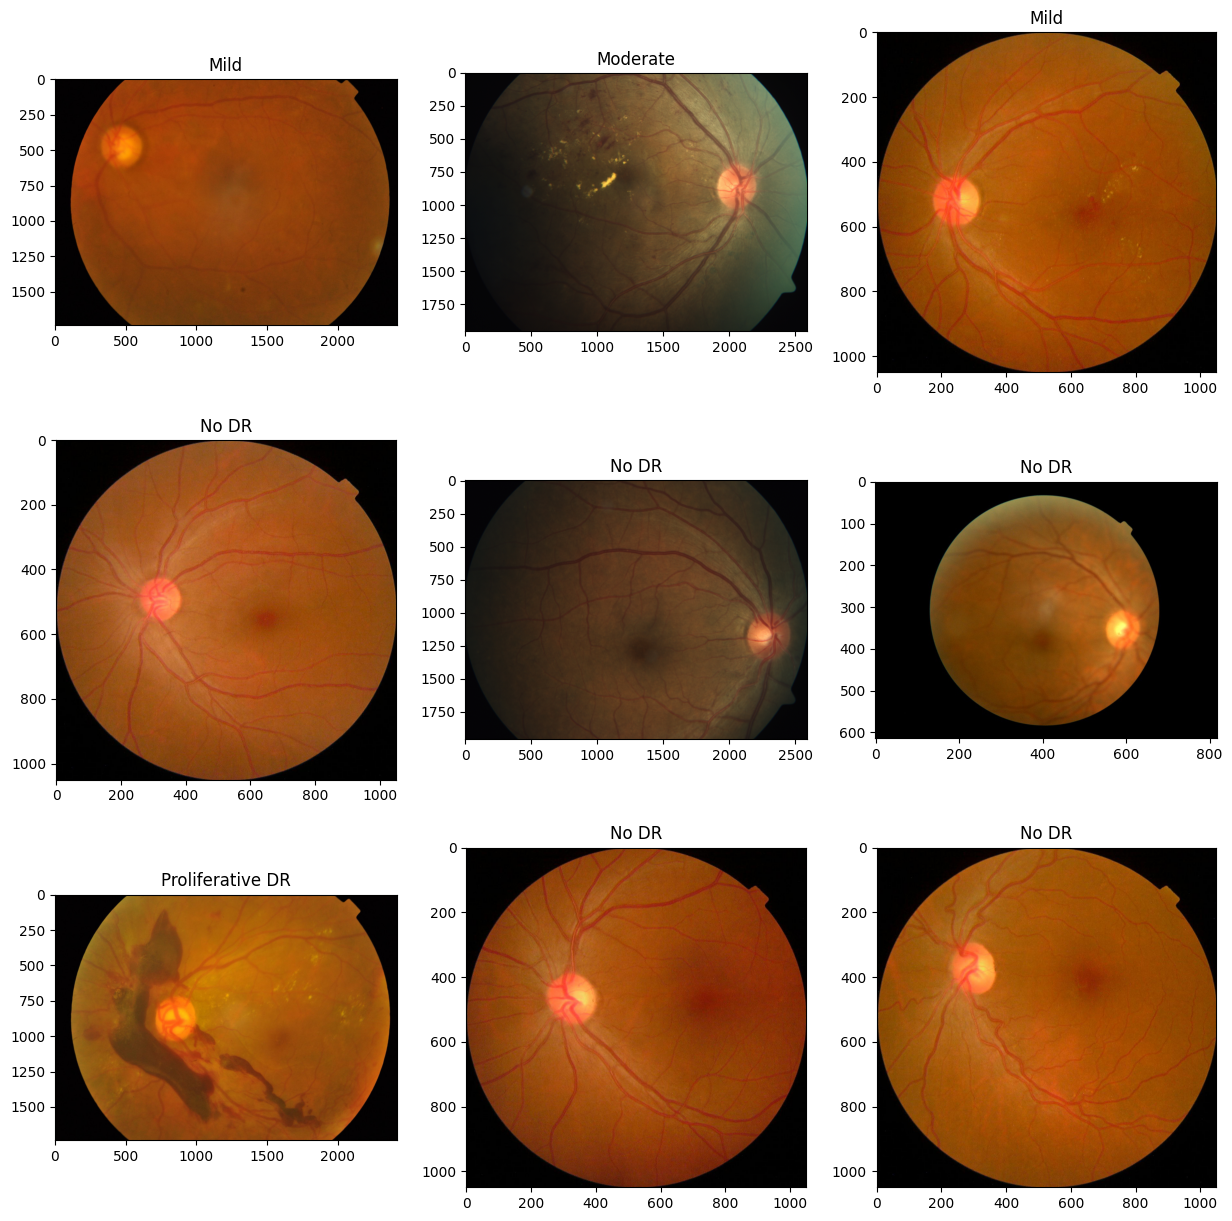

In [9]:
label_dic = {
    "0":"No DR",
    "1" : "Mild",
    "2":"Moderate",
    "3":"Severe",
    "4":"Proliferative DR"
}

# Checking Some Samples and Their Label
rows = 3
cols = 3
count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

indx = random.sample(range(train.shape[0]), rows * cols)

for i in range(rows):
    for j in range(cols):        
        if count < len(indx):
            img_path = "/kaggle/input/aptos2019-blindness-detection/train_images/"+train.iloc[indx[count],0]+".png"
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i,j].set_title(label_dic[str(train.iloc[indx[count],1])])
            count+=1

# Data Preparation

In [10]:
train["id_code"] = train["id_code"].apply(lambda x: x + ".png")
train['diagnosis'] = train['diagnosis'].astype('str')

Image Processing
* Image Resizing
* Image Scaling (0-255) (0-1)
* Data Augmentation
* Batching

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                 validation_split=0.2,
                                   
                                 horizontal_flip=True,
                                 rotation_range=20,      
                                 zoom_range=0.15,       
                                 width_shift_range=0.2,  
                                 height_shift_range=0.2)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/kaggle/input/aptos2019-blindness-detection/train_images",
    x_col="id_code",
    y_col="diagnosis",
    
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='training')

Found 2930 validated image filenames belonging to 5 classes.


In [12]:
valid_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/kaggle/input/aptos2019-blindness-detection/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=32,
    class_mode="categorical",    
    target_size=(224, 224),
    subset='validation')

Found 732 validated image filenames belonging to 5 classes.


In [13]:
# Displaying class distribution in training and validation sets 
print("Training class distribution:\n", train['diagnosis'].value_counts())
print("Validation class distribution:\n", train[train['id_code'].isin(valid_generator.filenames)]['diagnosis'].value_counts())

Training class distribution:
 diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64
Validation class distribution:
 diagnosis
0    337
2    221
1     77
4     59
3     38
Name: count, dtype: int64
